### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the UFC Stats Data

Since our main project data set contains time-series data, we will skip straight to step 3.

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# path folder
path = r'C:\Users\alexp\UFC Stats'
path

'C:\\Users\\alexp\\UFC Stats'

In [3]:
# import clean UFC data
df_ufc_my = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_ufc_clean_my.csv'), index_col = 0)

In [4]:
df_ufc_my.head(10)

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout,month,year
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.420000,0.330000,...,31,27,United States of America,KO/TKO,3,0:27,3 Rnd (5-5-5),Adrian Yanez,3,2021
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.660000,0.300000,...,32,28,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Trevin Giles,3,2021
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,...,32,28,United States of America,KO/TKO,1,0:49,3 Rnd (5-5-5),Tai Tuivasa,3,2021
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,...,28,25,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Montserrat Conejo,3,2021
4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.535625,0.185000,...,29,43,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Macy Chiasson,3,2021
5,Leonardo Santos,Grant Dawson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.515000,0.435000,...,27,41,United States of America,KO/TKO,3,4:59,3 Rnd (5-5-5),Grant Dawson,3,2021
6,Song Kenan,Max Griffin,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.459277,0.322188,...,35,31,United States of America,KO/TKO,1,2:20,3 Rnd (5-5-5),Max Griffin,3,2021
7,Derek Brunson,Kevin Holland,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.156250,0.791582,0.269199,...,28,37,United States of America,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Derek Brunson,3,2021
8,Montel Jackson,Jesse Strader,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,NaN,NaN,NaN,...,29,28,United States of America,KO/TKO,1,1:58,3 Rnd (5-5-5),Montel Jackson,3,2021
9,Bruno Silva,JP Buys,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Flyweight,NaN,NaN,NaN,...,24,31,United States of America,KO/TKO,2,2:56,3 Rnd (5-5-5),Bruno Silva,3,2021


In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df_ufc_my.dtypes

red_fighter                      object
blue_fighter                     object
date                             object
location                         object
winner                           object
title_bout                         bool
weight_class                     object
B_avg_KD                        float64
B_avg_SIG_STR_pct               float64
B_avg_TD_pct                    float64
B_avg_SUB_ATT                   float64
B_avg_REV                       float64
B_avg_SIG_STR_att               float64
B_avg_SIG_STR_landed            float64
B_avg_TOTAL_STR_att             float64
B_avg_TOTAL_STR_landed          float64
B_avg_TD_att                    float64
B_avg_TD_landed                 float64
B_avg_HEAD_att                  float64
B_avg_HEAD_landed               float64
B_avg_BODY_att                  float64
B_avg_BODY_landed               float64
B_avg_LEG_att                   float64
B_avg_LEG_landed                float64
B_avg_DISTANCE_att              float64


In [7]:
df_ufc_my.shape

(6012, 101)

### 2. Subsetting, wrangling, and cleaning time-series data

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df_ufc_my.head()

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_SIG_STR_pct,R_avg_TD_pct,R_avg_SUB_ATT,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout,month,year
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.420000,0.330,0.500,0.00,50.0000,20.0000,76.5000,41.000,1.500,1.0,39.500,11.000,7.5000,7.0000,3.000,2.000,35.0000,12.5,10.5000,4.5000,4.5000,3.000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135,1.000000,0.500000,0.000000,0.000000,0.00000,34.000000,17.000000,35.000000,18.000000,0.000000,0.000000,32.00000,15.000000,2.000000,2.000000,0.000000,0.000000,33.000000,16.000000,1.000000,1.000000,0.000000,0.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135,31,27,United States of America,KO/TKO,3,0:27,3 Rnd (5-5-5),Adrian Yanez,3,2021
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.660000,0.300,1.500,0.00,65.5000,35.0000,113.5000,68.500,2.500,1.5,46.000,20.000,12.0000,8.0000,7.500,7.000,58.0000,30.0,0.5000,0.5000,7.0000,4.500,577.5,4,0,2,0,2,2,0,0,0,1,0,1,0,0,Orthodox,187.96,193.04,205,1.031250,0.576875,0.406250,0.250000,0.37500,77.562500,43.156250,93.125000,57.218750,1.281250,0.781250,71.09375,38.062500,4.687500,3.312500,1.781250,1.781250,58.312500,30.437500,6.968750,3.656250,12.281250,9.062500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,Orthodox,182.88,187.96,185,32,28,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Trevin Giles,3,2021
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,187.96,190.50,241,0.546875,0.538906,0.000000,0.000000,0.00000,59.234375,30.375000,70.500000,41.390625,0.031250,0.000000,42.50000,16.781250,5.781250,4.546875,10.953125,9.046875,45.875000,20.281250,11.328125,8.562500,2.031250,1.531250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,Southpaw,187.96,190.50,264,32,28,United States of America,KO/TKO,1,0:49,3 Rnd (5-5-5),Tai Tuivasa,3,2021
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Southpaw,152.40,154.94,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Switch,160.02,160.02,115,28,25,United States of America,De

#### Dropping columns

In [10]:
# Remove categorical variables
df_ufc_my = df_ufc_my.drop(columns = ['red_fighter', 'blue_fighter', 'winner', 'title_bout', 'weight_class', 'B_Stance', 'R_Stance', 'method', 'round', 'winner_of_bout'])

In [11]:
df_ufc_my.head()

,date,location,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_SIG_STR_pct,R_avg_TD_pct,R_avg_SUB_ATT,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,number_of_rounds,last_round_time,month,year
0,3/20/2021,"Las Vegas, Nevada, USA",0.000,0.420000,0.330,0.500,0.00,50.0000,20.0000,76.5000,41.000,1.500,1.0,39.500,11.000,7.5000,7.0000,3.000,2.000,35.0000,12.5,10.5000,4.5000,4.5000,3.000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135,1.000000,0.500000,0.000000,0.000000,0.00000,34.000000,17.000000,35.000000,18.000000,0.000000,0.000000,32.00000,15.000000,2.000000,2.000000,0.000000,0.000000,33.000000,16.000000,1.000000,1.000000,0.000000,0.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135,31,27,United States of America,3,0:27,3,2021
1,3/20/2021,"Las Vegas, Nevada, USA",0.500,0.660000,0.300,1.500,0.00,65.5000,35.0000,113.5000,68.500,2.500,1.5,46.000,20.000,12.0000,8.0000,7.500,7.000,58.0000,30.0,0.5000,0.5000,7.0000,4.500,577.5,4,0,2,0,2,2,0,0,0,1,0,1,0,0,187.96,193.04,205,1.031250,0.576875,0.406250,0.250000,0.37500,77.562500,43.156250,93.125000,57.218750,1.281250,0.781250,71.09375,38.062500,4.687500,3.312500,1.781250,1.781250,58.312500,30.437500,6.968750,3.656250,12.281250,9.062500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,182.88,187.96,185,32,28,United States of America,3,5:00,3,2021
2,3/20/2021,"Las Vegas, Nevada, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187.96,190.50,241,0.546875,0.538906,0.000000,0.000000,0.00000,59.234375,30.375000,70.500000,41.390625,0.031250,0.000000,42.50000,16.781250,5.781250,4.546875,10.953125,9.046875,45.875000,20.281250,11.328125,8.562500,2.031250,1.531250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,187.96,190.50,264,32,28,United States of America,1,0:49,3,2021
3,3/20/2021,"Las Vegas, Nevada, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152.40,154.94,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160.02,160.02,115,28,25,United States of America,3,5:00,3,2021
4,3/20/2021,"Las Vegas, Nevada, USA",0.125,0.535625,0.185,0.125,0.25,109.1875,57.9375,170.4375,105.625,5.375,1.5,77.375,31.375,31.1875,26.1875,0.625,0.375,33.5625,11.0,39.0625,28.8125,36.5625,18.125,764.0,11,1,3,0,3,4,1,0,0,0,1,2,1,0,180.34,182.88,135,0.000000,0.403076,0.511719,0.231445,0.03125,109.331055,44.362305,137.154297,70.198242,2.261719,1.261719,86.37500,26.030273,17.272461,13.469727,5.683594,4.862305,85.845703,27.907227,18.996094,13.970703,4.489258,2.484375,874.380859,30,

#### Subsetting

We want to see how many fights occur for each date. Date and location are the columns that will be used to answer this. However, the "country" column is textual. We will need to convert "country" to numeric.

In [12]:
# create a subset of the columns needed
ufc_fights = df_ufc_my[['date', 'location', 'country', 'month', 'year']]

In [13]:
ufc_fights.head()

,date,location,country,month,year
0,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021
1,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021
2,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021
3,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021
4,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021


In [14]:
from datetime import datetime

ufc_fights['datetime'] = pd.to_datetime(ufc_fights['date']) # Create a datetime column from "date."
ufc_fights = ufc_fights.set_index('datetime') # Set the datetime as the index of the dataframe.
ufc_fights.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
ufc_fights.head()

,location,country,month,year
datetime,,,,
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021


#### Check for mixed-type data

In [15]:
for col in ufc_fights.columns.tolist():
  weird = (ufc_fights[[col]].applymap(type) != ufc_fights[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (ufc_fights[weird]) > 0:
    print (col)

No mixed-type data have been found.

#### Check for missing values

In [16]:
ufc_fights.isnull().sum()

location    0
country     0
month       0
year        0
dtype: int64

No missing values have been found.

#### Check duplicates

In [17]:
ufc_fights_dups = ufc_fights[ufc_fights.duplicated()]
ufc_fights_dups

,location,country,month,year
datetime,,,,
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021


UFC events have more than one bout which occur on the same day which explains the duplicates. Deletion is not necessary.

In [18]:
ufc_fights['total_fights'] = ufc_fights.groupby(['datetime'])['location'].count()

In [19]:
ufc_fights.head(50)

,location,country,month,year,total_fights
datetime,,,,,
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10


In [20]:
ufc_fights.head(60)

,location,country,month,year,total_fights
datetime,,,,,
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,"Las Vegas, Nevada, USA",United States of America,3,2021,10


There are duplicated dates in the final dataframe.

In [21]:
# Export ufc_fights dataframe in "Prepared Data"
ufc_fights.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'date.csv'))

Create a new dataframe in order to remove the duplicates and call it ufc_fights_2 to successfully run the decompose.

In [22]:
# import ufc_fights_2 data
ufc_fights_2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'date2.csv'))

In [23]:
ufc_fights_2.head()

,datetime,date,location,country,month,year,total_fights
0,3/20/2021,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
1,3/20/2021,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2,3/20/2021,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
3,3/20/2021,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
4,3/20/2021,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10


In [24]:
ufc_fights_2['datetime'] = pd.to_datetime(ufc_fights_2['date']) # Create a datetime column from "date."
ufc_fights_2 = ufc_fights_2.set_index('datetime') # Set the datetime as the index of the dataframe.

In [25]:
ufc_fights_2.head()

,date,location,country,month,year,total_fights
datetime,,,,,,
2021-03-20,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-20,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10


In [26]:
ufc_fights_2 = ufc_fights_2.drop_duplicates(['date'])

In [27]:
ufc_fights_2.head(100)

,date,location,country,month,year,total_fights
datetime,,,,,,
2021-03-20,3/20/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,10
2021-03-13,3/13/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,13
2021-03-06,3/6/2021,"Las Vegas, Nevada, USA",United States of America,3,2021,15
2021-02-27,2/27/2021,"Las Vegas, Nevada, USA",United States of America,2,2021,9
2021-02-20,2/20/2021,"Las Vegas, Nevada, USA",United States of America,2,2021,12
2021-02-13,2/13/2021,"Las Vegas, Nevada, USA",United States of America,2,2021,10
2021-02-06,2/6/2021,"Las Vegas, Nevada, USA",United States of America,2,2021,12
2021-01-23,1/23/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,1,2021,11
2021-01-20,1/20/2021,"Abu Dhabi, Abu Dhabi, United Arab Emirates",United Arab Emirates,1,2021,14


To ensure my dataset is accurate, date was included for the new dataframe (ufc_fights_2). All fights that occurred for each month and year have been recognized.

In [28]:
ufc_fights_2 = ufc_fights_2.drop(columns = ['date', 'location', 'country', 'month', 'year'])

In [29]:
ufc_fights_2.head(20)

,total_fights
datetime,
2021-03-20,10
2021-03-13,13
2021-03-06,15
2021-02-27,9
2021-02-20,12
2021-02-13,10
2021-02-06,12
2021-01-23,11
2021-01-20,14


In [30]:
ufc_fights_2.sort_index(inplace= True)

In [31]:
ufc_fights_2.head(20)

,total_fights
datetime,
1994-03-11,15
1994-09-09,6
1994-12-16,8
1995-04-07,10
1995-07-14,8
1995-09-08,9
1995-12-16,7
1996-02-16,8
1996-05-17,7


In [36]:
uf_fights_2.values_counts()

NameError: name 'uf_fights_2' is not defined

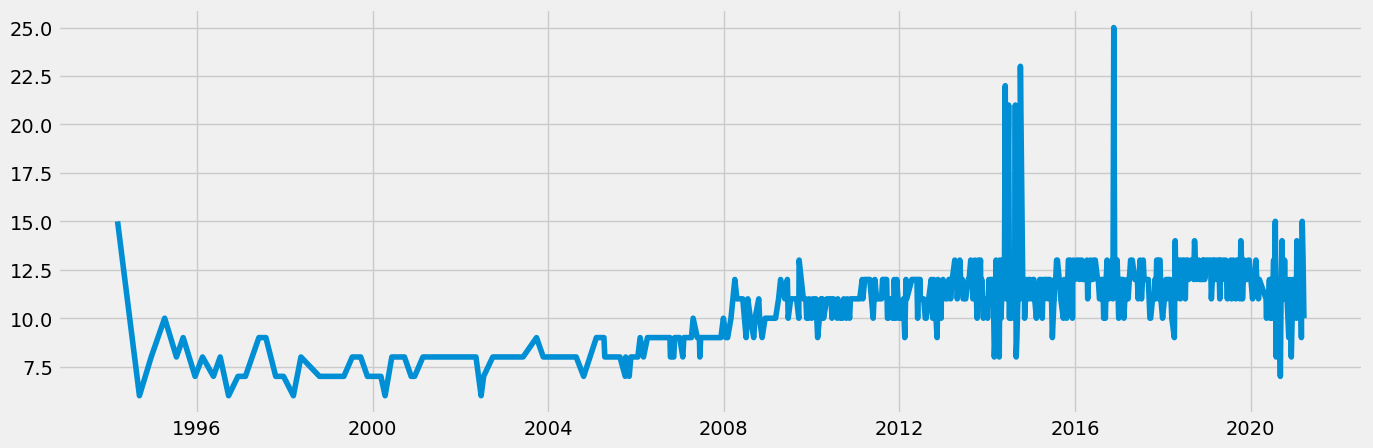

In [32]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ufc_fights_2)

### 3. Time series analysis: decomposition

In [33]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(ufc_fights_2, model='additive', period=1)

In [34]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

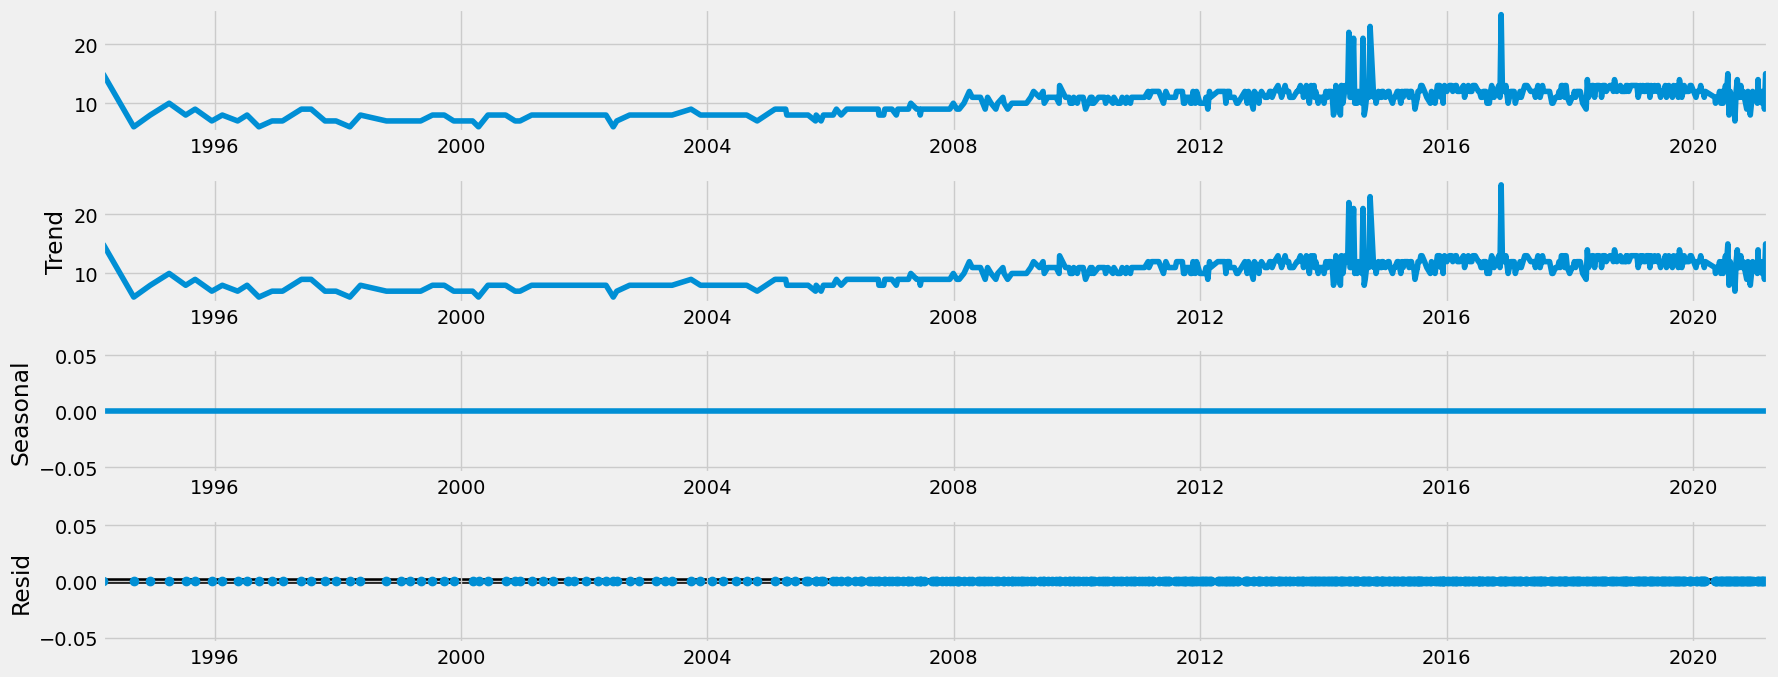

In [35]:
# Plot the separate components
decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [39]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(ufc_fights_2['total_fights'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.195680
p-value                          0.207817
Number of Lags Used             15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64


The test statistic is smaller than the critical value (5%), we can reject the null hypothesis.

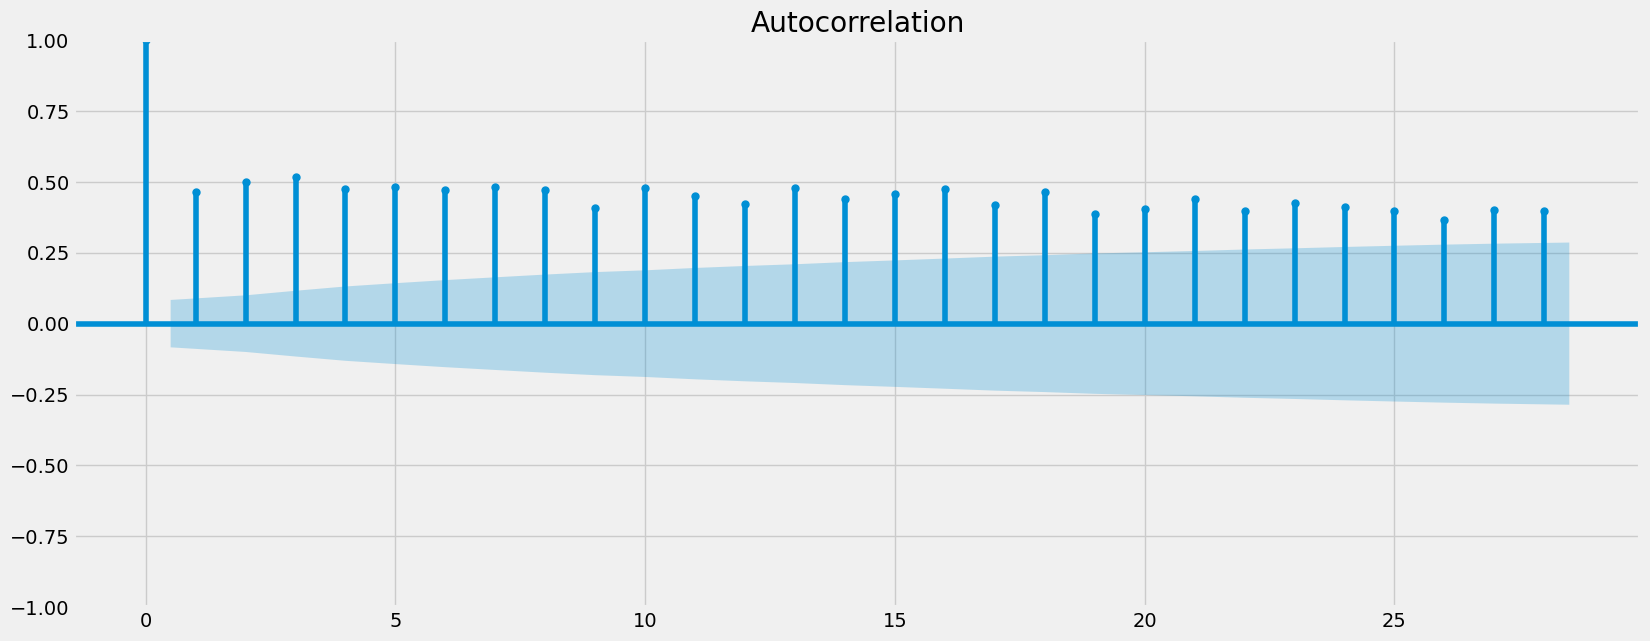

In [40]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(ufc_fights_2)
plt.show()

The vertical lines represents lags in the series, while the blue area represents the confidence interval. The lines go above the blue edge of the confidence interval, which means there are lags that are significantly correlated with each other. Since there are many lags in this interval, I can conclude that the data is non-stationary.

### 5. Stationarizing the UFC Stats Data

In [42]:
data_diff = ufc_fights_2 - ufc_fights_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [43]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [45]:
data_diff.head(20)

,total_fights
datetime,
1994-09-09,-9.0
1994-12-16,2.0
1995-04-07,2.0
1995-07-14,-2.0
1995-09-08,1.0
1995-12-16,-2.0
1996-02-16,1.0
1996-05-17,-1.0
1996-07-12,1.0


In [46]:
data_diff.columns

Index(['total_fights'], dtype='object')

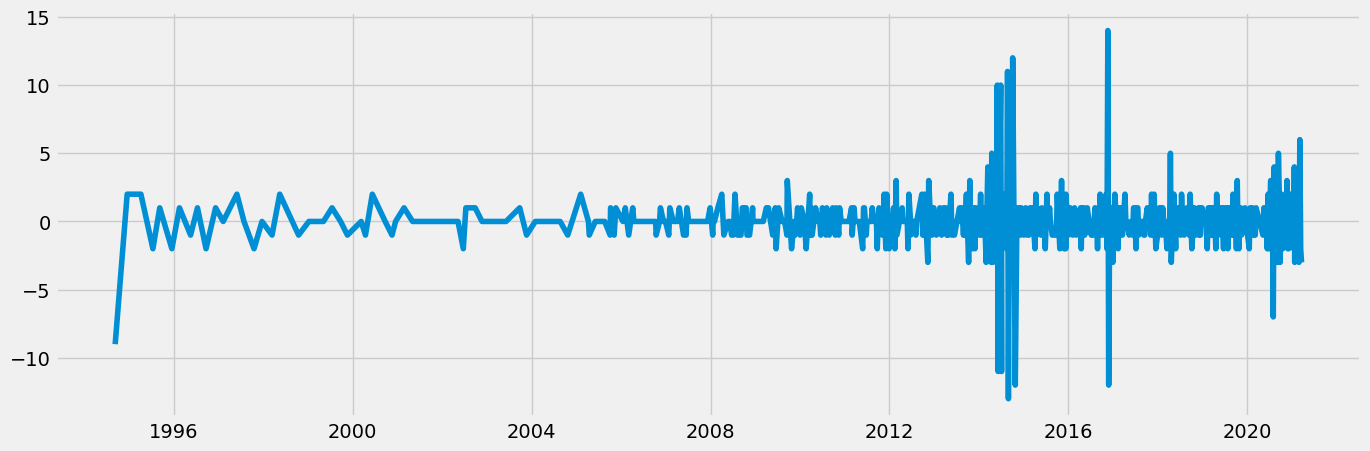

In [47]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [48]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.077983e+01
p-value                        2.270059e-19
Number of Lags Used            1.400000e+01
Number of Observations Used    5.340000e+02
Critical Value (1%)           -3.442655e+00
Critical Value (5%)           -2.866968e+00
Critical Value (10%)          -2.569661e+00
dtype: float64


The test statistic is smaller than the critical value (5%), we can reject the null hypothesis.

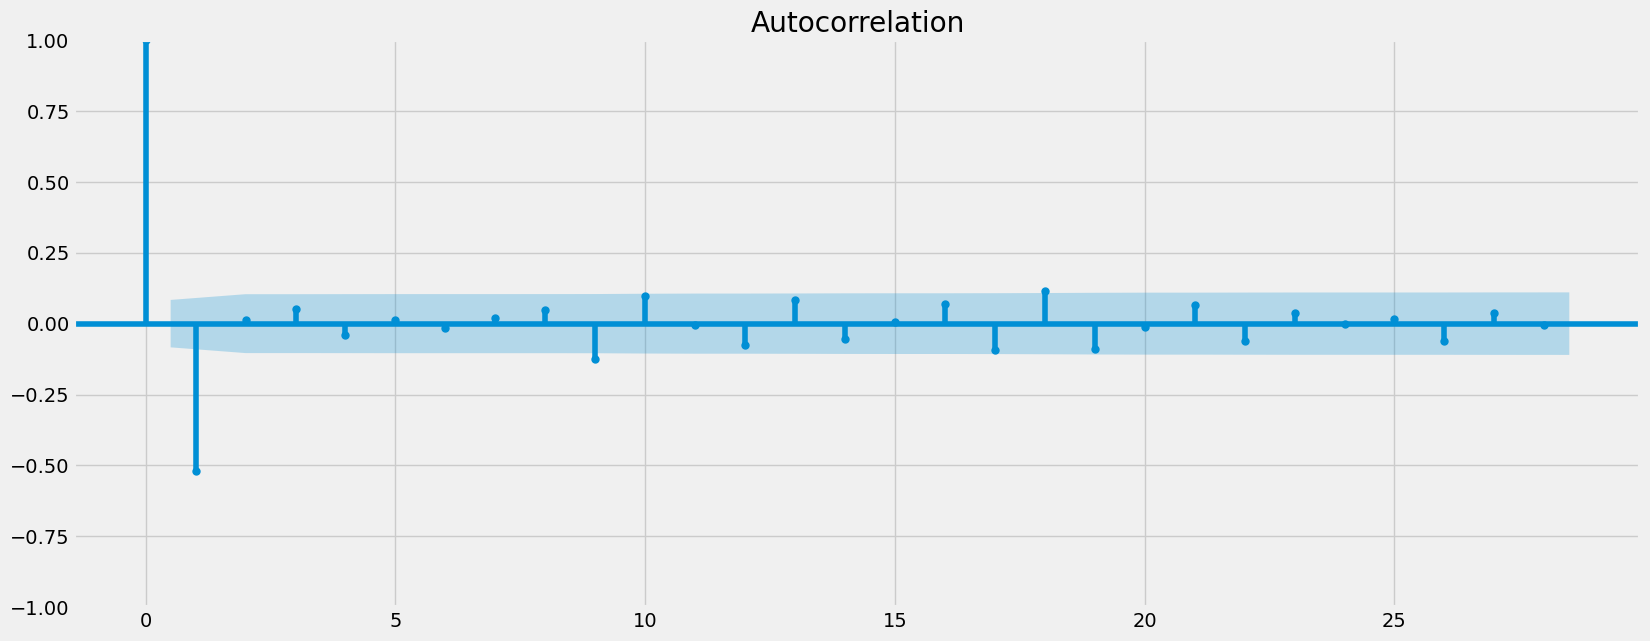

In [49]:
plot_acf(data_diff)
plt.show()

The data has a satisfactory p-value (p<0.05) and, as a result, is stationary.